# Data Understanding and Description :

In [1]:
# import the relevant libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data : 
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Save the data first five rows as CSV file :
data.head().to_csv('data_head.csv', index=False)

In [4]:
# Display the shape of the dataset :
data.shape

(11162, 17)

In [5]:
# Display the frequency of each unique value in the 'deposit' target variable
data['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

_____

# Exploratory Data Analysis (EDA) :

## Statistics summary for numerical variables :

In [6]:
# Statistics summary for numerical features  :
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Save the summary as CSV file : 
data.describe().to_csv('summary_statistics.csv')

## Visualization of Numerical variables Distributions:

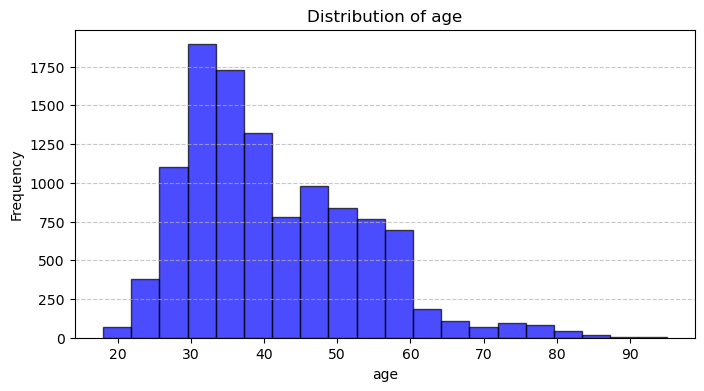

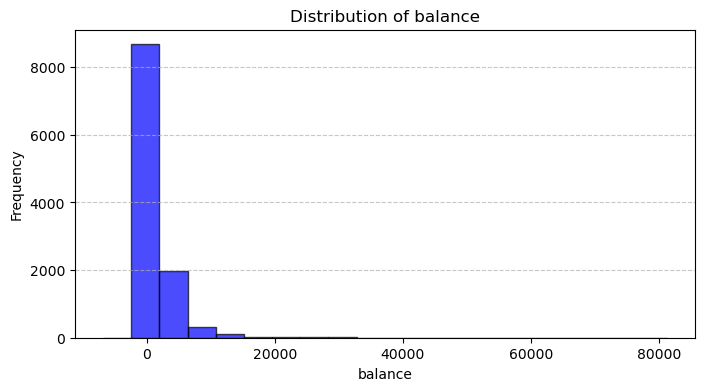

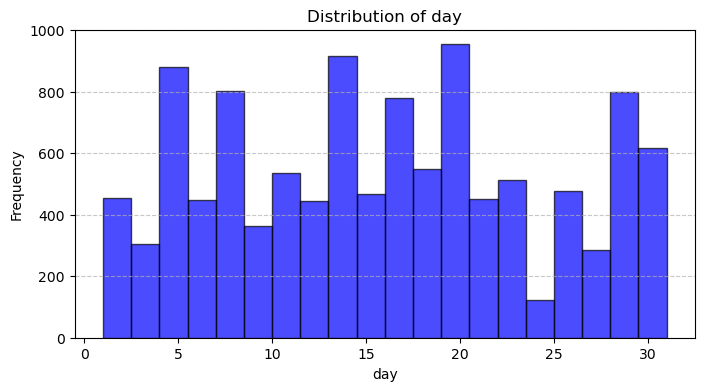

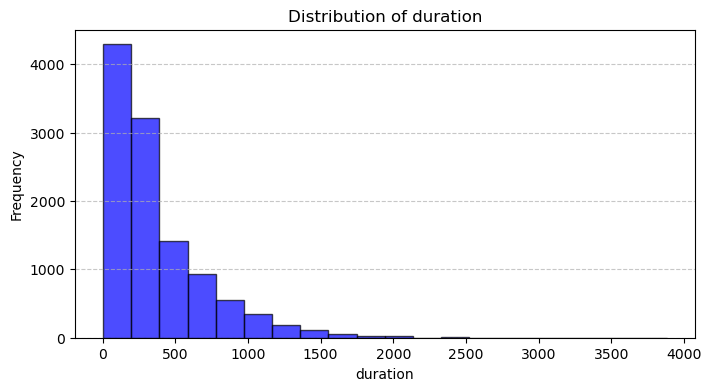

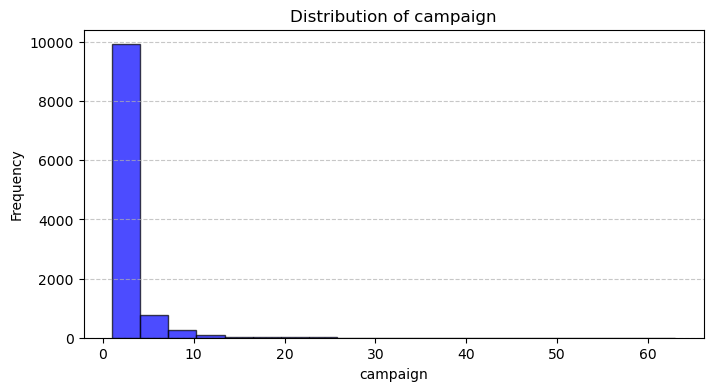

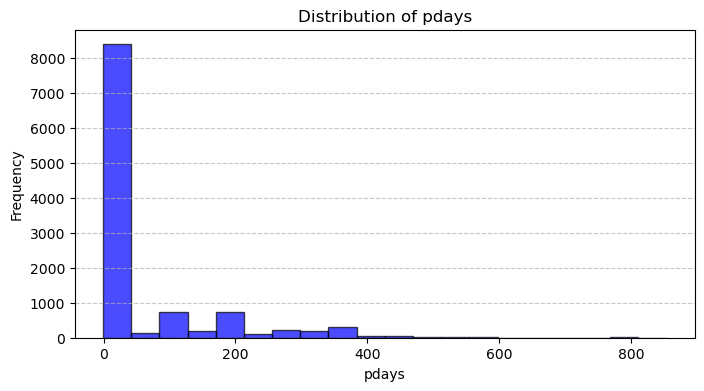

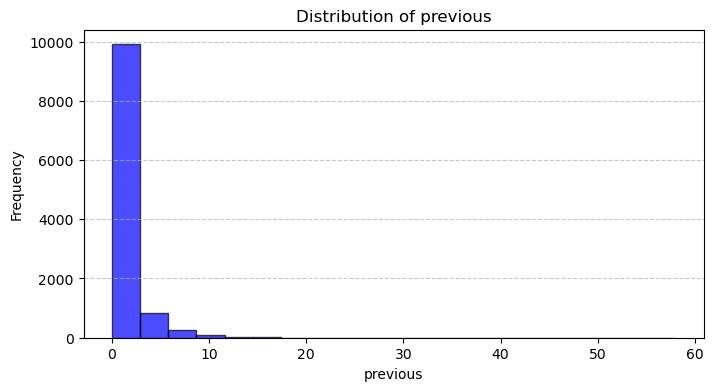

In [7]:
# Select Numeric columns : 
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns : 
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save each figure as a PNG file :
    plt.savefig(f'{col}_distribution.png', format='png')

    # Show the plot
    plt.show()

## Analysis of Categorical and binary variables :

#### Get description of each columns : 

In [10]:
# Select Categorical columns : 
categorical_columns = data.select_dtypes(include=['object']).columns

# Loop through categorical columns : 
for col in categorical_columns:
    
    # Get the description of each column : 
    description_df = data[col].describe()

    # Convert each description to a DataFrame
    description_df = description_df.to_frame()

    # Save each description as a CSV file
    description_df.to_csv(f'{col}_description.csv', index=True) 

    print(description_df)

               job
count        11162
unique          12
top     management
freq          2566
        marital
count     11162
unique        3
top     married
freq       6351
        education
count       11162
unique          4
top     secondary
freq         5476
       default
count    11162
unique       2
top         no
freq     10994
       housing
count    11162
unique       2
top         no
freq      5881
         loan
count   11162
unique      2
top        no
freq     9702
         contact
count      11162
unique         3
top     cellular
freq        8042
        month
count   11162
unique     12
top       may
freq     2824
       poutcome
count     11162
unique        4
top     unknown
freq       8326
       deposit
count    11162
unique       2
top         no
freq      5873


#### Vizualisation :

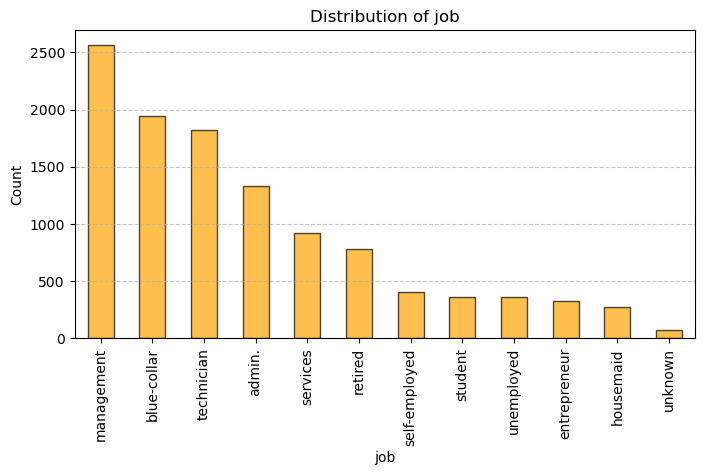

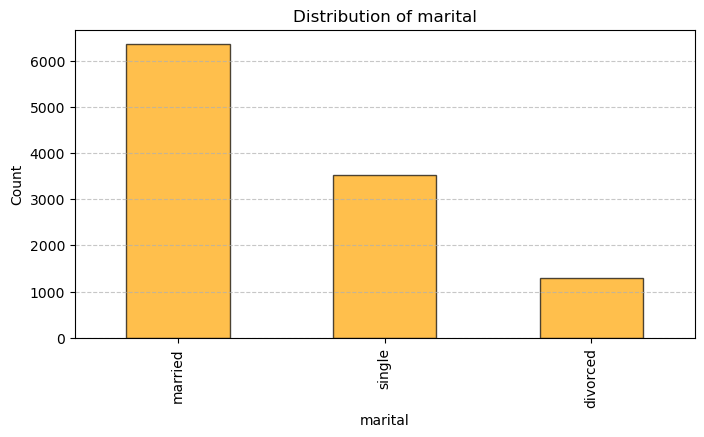

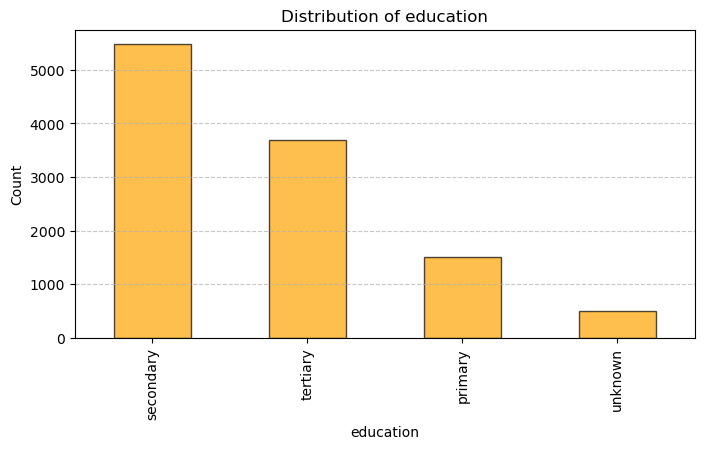

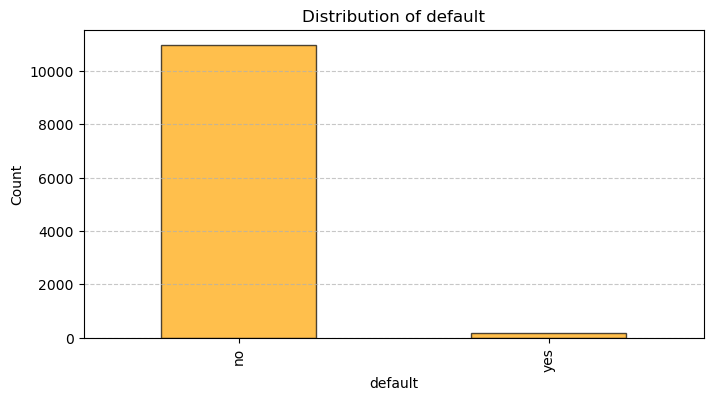

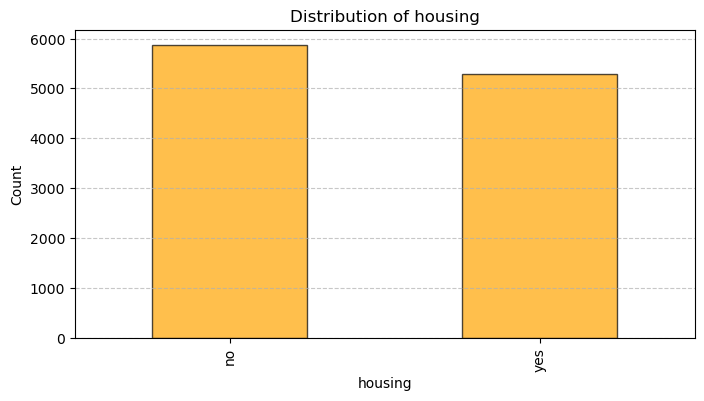

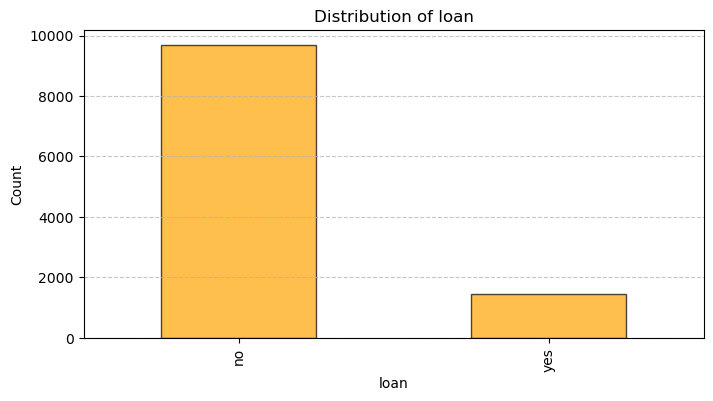

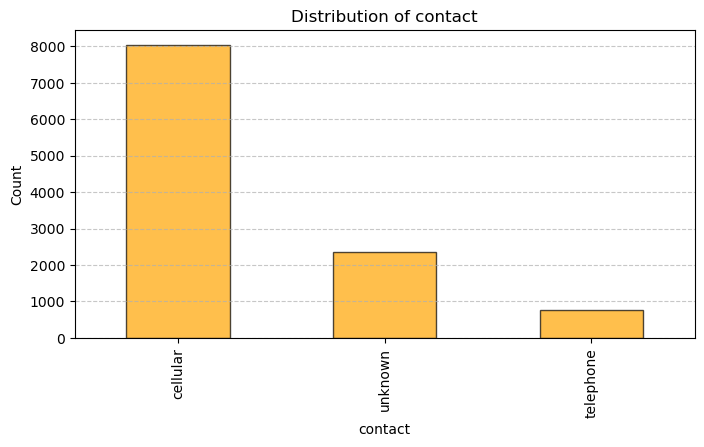

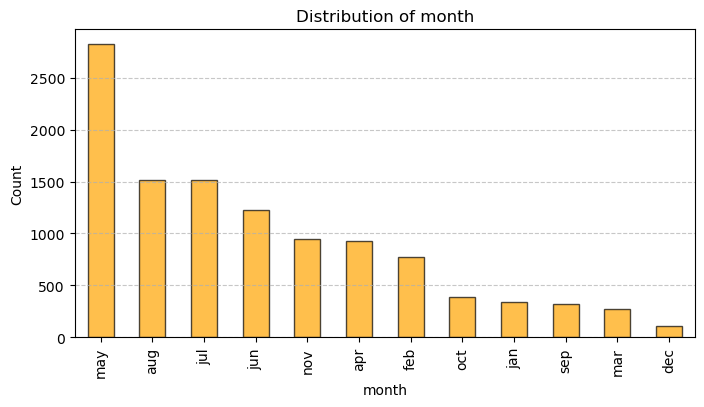

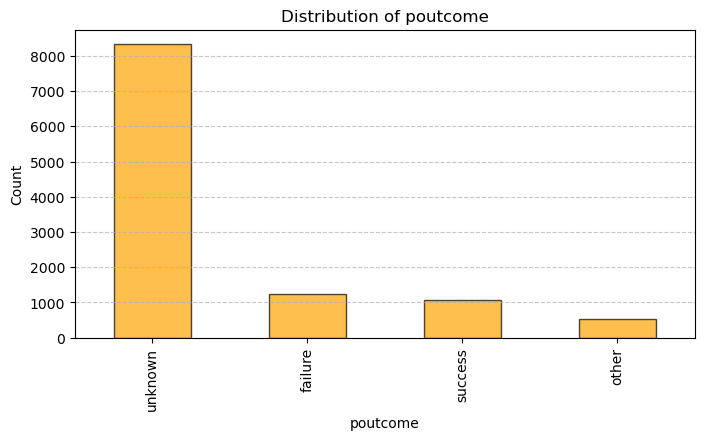

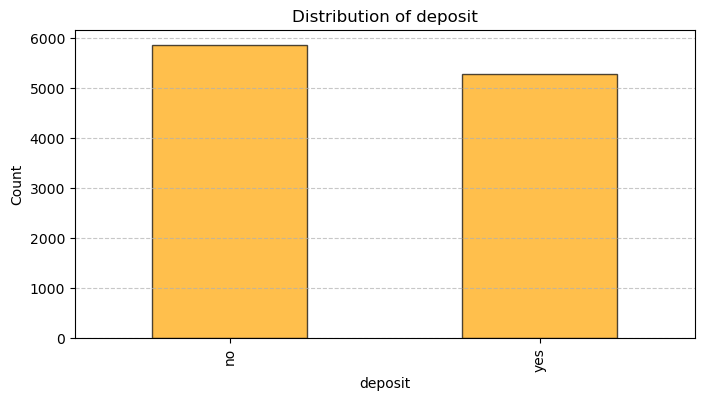

In [11]:
# Plot bar charts for each columns : 

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save the figure as a PNG file :
    plt.savefig(f'{col}_distribution.png', format='png')

    # Show the plot
    plt.show()

#### For the target variable :

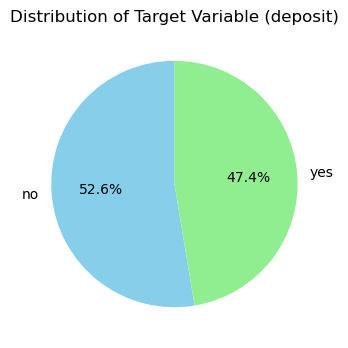

In [12]:
# Target variable plot :
plt.figure(figsize=(6, 4))
data['deposit'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Target Variable (deposit)')
plt.ylabel('')

# Save the figure as a PNG file
plt.savefig('deposit_distribution.png', format='png')

# Show the plot
plt.show()

## Correlation Analysis :

#### Correlation matrix :

In [13]:
# Select only numeric columns for correlation
data_num = data.select_dtypes(include=['number'])
data_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [14]:
# Compute the correlation matrix
correlation_matrix = data_num.corr()

# Save the correlation matrix as a CSV file
correlation_matrix.to_csv('correlation_matrix.csv', index=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


#### Correlation Matrix Heatmap :

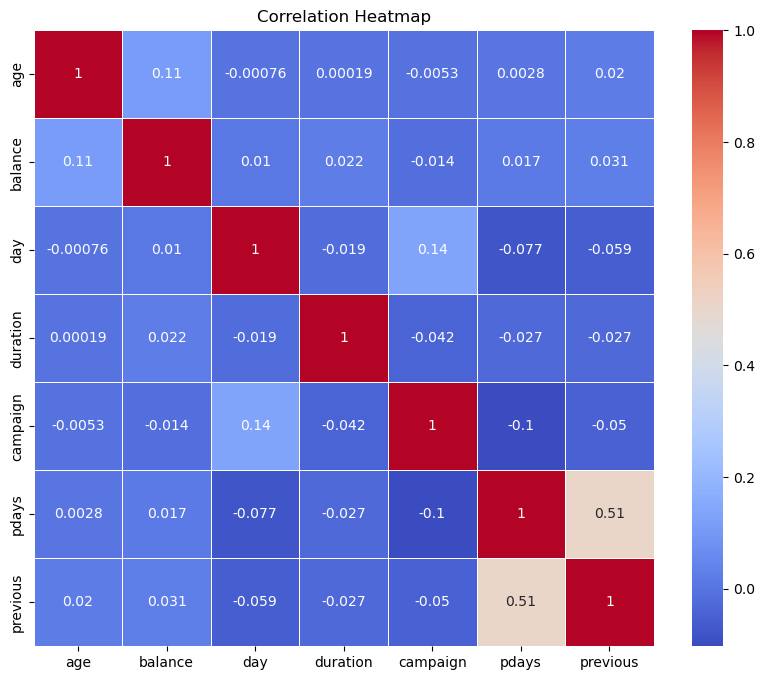

In [15]:
# Create the heatmap
plt.figure(figsize=(10, 8))
  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Save the heatmap as a PNG figure
plt.savefig('correlation_heatmap1.png', format='png')

# Show the heatmap
plt.show()

## Data Cleaning and Preprocessing :

#### Handling missing values :

In [16]:
# Cheking for missing values : 
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [18]:
# Save the result as a CSV file
missing_values.to_csv('missing_data_summary.csv', header=True)

The data does not contain any missin value

#### Removing Duplicate Rows :

In [19]:
data = data.drop_duplicates()

#### Outliers Detection (Box plot) :

Outliers detection for numerical columns

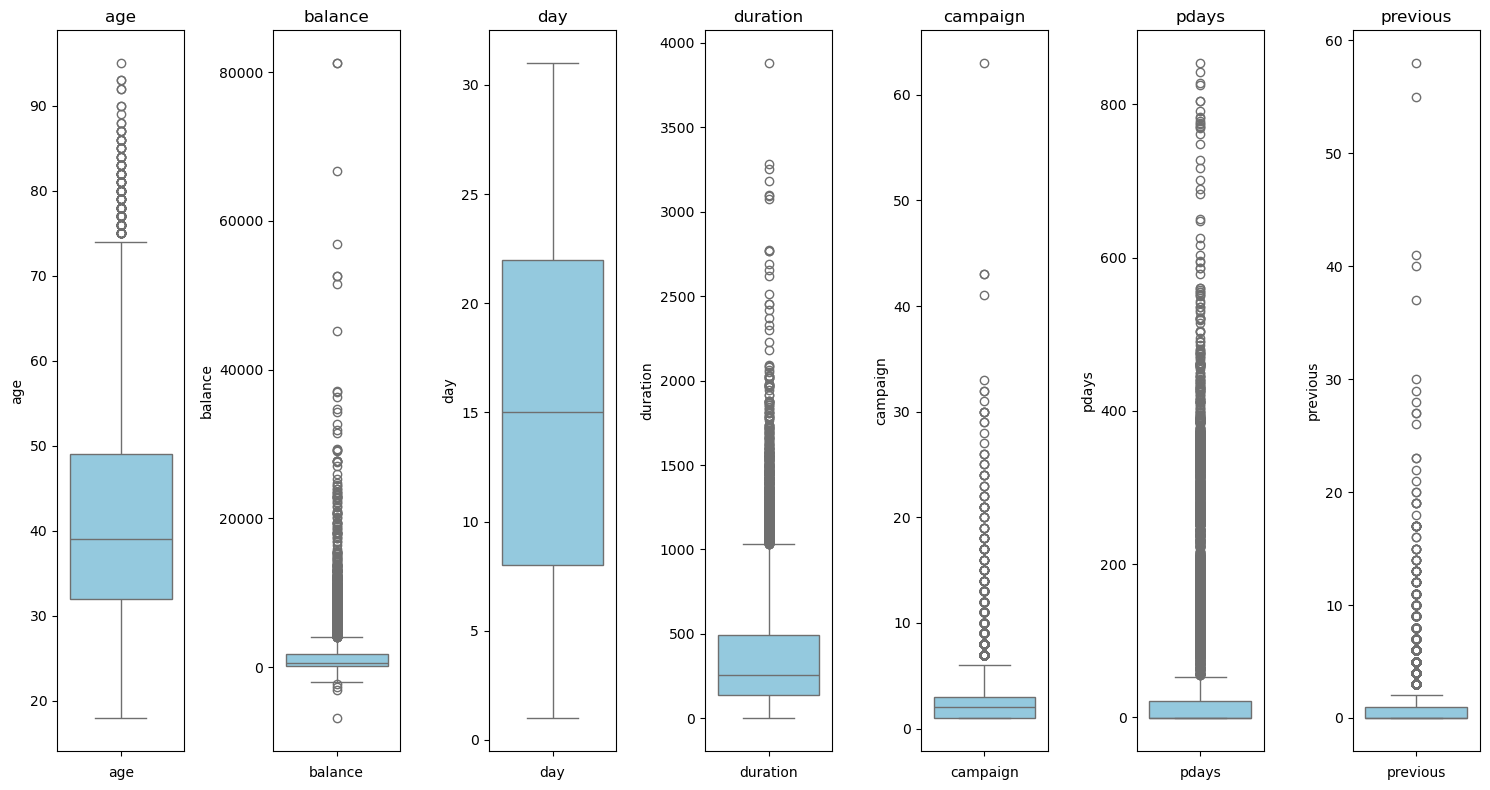

In [20]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))

# Create box plots for each column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()

# Save plot as PNG :
plt.savefig('outliers_boxplot.png', bbox_inches='tight')

plt.show()

#### Outliers remouval :

Save a copy of the original data before removing outliers :

In [21]:
# Save a copy of the original data :
data_original = data.copy()

In [22]:
# List of numeric columns that have outliers : 
outlier_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous','age']

# Calculate Q1 and Q3 for the outliers columns : 
Q1 = data[outlier_columns].quantile(0.25)            # 25th percentile
Q3 = data[outlier_columns].quantile(0.75)           # 75th percentile

# Calculate IQR  (The Interquartile Range) : 
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers        
data = data[~((data[outlier_columns] < lower_bound) | (data[outlier_columns] > upper_bound)).any(axis=1)]

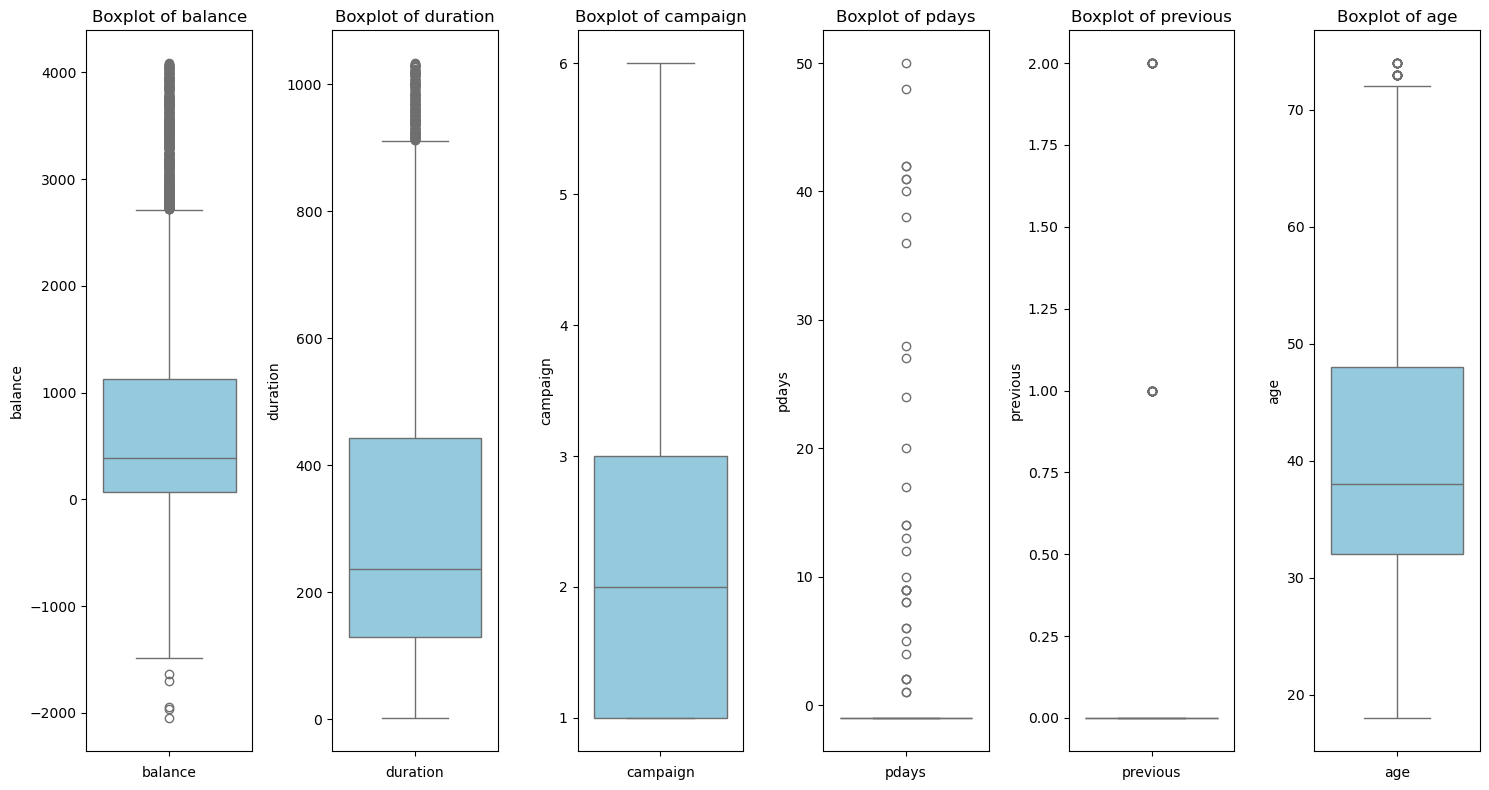

In [23]:
plt.figure(figsize=(15, 8))

# Create box plots for each column
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, len(outlier_columns), i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.savefig('outliers_removed.png', bbox_inches='tight')
plt.show()

In [24]:
# Check the size of our dataset after removing the outliers
print("Length of data after outliers remouval : ", len(data))

Length of data after outliers remouval :  6557


In [25]:
# Check the size of our dataset before removing the outliers
print("Length of data before outliers remouval : ", len(data_original) )

Length of data before outliers remouval :  11162


## Binary Encoding of Binary Variables :

In [26]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [27]:
data.head().to_csv('data_head5.csv', index=True)

## Label Encoding of Categorical Variables :

In [28]:
# Select the columns :
categorical = ["job", "marital", "education", "contact","month","poutcome"]

for features in categorical :
    data[features] = data[features].astype('category').cat.codes

In [29]:
data.head().to_csv('data_head6.csv', index=True)

_____